<table style="width: 100%; border: none; background: linear-gradient(to bottom, #f8f9fa, #e9ecef); padding: 30px; border-radius: 10px; box-shadow: 0 2px 5px rgba(0,0,0,0.1);">
    <tr>
        <td style="width: 22%; border: none; vertical-align: middle; text-align: center;">
            <img src="https://www.inf.ucv.cl/wp-content/uploads/2020/05/logo_escuela.jpg" width="170" style="max-width: 100%;">
        </td>
        <td style="width: 56%; border: none; vertical-align: middle; text-align: center; padding: 0 20px;">
            <h1 style="font-size: 28px; color: #1a3b5c; margin-bottom: 16px; border-bottom: 2px solid #1a3b5c; padding-bottom: 8px;">Tarea 1</h1>
            <p style="font-size: 16px; margin: 8px 0;"><strong>Pontificia Universidad Católica de Valparaíso</strong><br>
            <strong>Escuela de Ingeniería Informática</strong></p>
            <p style="font-size: 14px; color: #333; margin: 12px 0;"><strong>ICI3244 Redes Neuronales Profundas / MII910 Deep Learning </strong><br>
            <strong>Trimestre/Semestre: 1-2025</strong><br>
            <strong>Profesor: Carlos Valle</strong><br>
            <strong>Fecha: 11 de abril de 2025</strong></p>
        </td>
        <td style="width: 22%; border: none; vertical-align: middle; text-align: center;">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/PUCV_Escudo2016.svg/1200px-PUCV_Escudo2016.svg.png" width="140" style="max-width: 100%;">
        </td>
    </tr>
</table>

### **Temas**

- Manipulaciones en TensorFlow, Keras, Pandas y Numpy  
- Redes Densas Feedforward  
- Regularización y Dropout  
- Vanishing Gradient y Skip Connections  
- Learn Rate Decay  
- Optimizadores  

---

### **Instrucciones Generales**

- Trabajo en equipos de **2 o 3 personas**
- Entregable: **Jupyter Notebook** subido a un **repositorio privado de GitHub**
- Presentación de resultados: **9 de mayo**
- Entrega final: **10 de mayo a las 19:00 horas**
- Enviar link de GitHub al correo: <carlos.valle@pucv.cl> (Asunto: [ICI3244/MII910-1-2025 Tarea1])
- Invitar como colaborador al usuario: **cvalle231**

Estructura del notebook:
- Celdas de código con explicaciones claras
- Comentarios en el código
- Visualizaciones
- Interpretación de resultados y justificación de decisiones

Se recomienda utilizar **Google Colab** con **TPU** como acelerador.

---

# (50%) 1. Conceptos básicos de redes neuronales

Las redes neuronales densas o _Feed Forward_ son una de las arquitecturas más simples dentro del aprendizaje profundo. En estas redes, cada neurona de una capa se conecta con todas las neuronas de la capa siguiente. A pesar de su simplicidad, este tipo de red ofrece muy buen rendimiento en diversas aplicaciones, y suele ser la base para el estudio de muchos fenómenos clave en el desarrollo de redes neuronales, como el _vanishing gradient_, el _exploding gradient_ o la influencia de distintos hiperparámetros.

En esta primera parte de la tarea exploraremos redes densas, ajustando hiperparámetros como la profundidad de la red, número de unidades, _learning rate_, entre otros. También estudiaremos técnicas de regularización y evaluaremos el desempeño de distintos optimizadores.

<div align='center'>  
  <img src="https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/water-flea-daphnia-magna-ted-kinsman.jpg" width="40%" height="30%" />  
</div>

Trabajaremos con un problema de regresión usando TensorFlow y Keras. Para enfocarnos en los conceptos fundamentales y evitar tiempos de entrenamiento largos, usaremos un dataset pequeño (menos de 1000 observaciones). Esto nos permitirá ilustrar bien los conceptos, aunque cabe recordar que las redes neuronales suelen requerir grandes volúmenes de datos para alcanzar su máximo potencial (_data hungry_).

El dataset contiene 8 descriptores moleculares de 546 productos químicos, y tiene como objetivo predecir la toxicidad acuática aguda sobre la especie **Daphnia Magna**.  
🔗 Puedes encontrarlo aquí: https://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity

La nota de esta pregunta se calcula: $\left(\frac{\mbox{suma de puntos obtenidos}*6}{100}\right)+1$


## 1.a Carga de datos y preprocesamiento

In [ ]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)
sns.set_palette("deep")

### 1.a.1 (1 pt) Carguemos los datos

In [ ]:
# URL del dataset
url = "https://github.com/reddyprasade/Machine-Learning-Problems-DataSets/raw/master/Regression/QSAR_aquatic_toxicity.csv"

# Cargar el dataset usando pd.read_csv
df = pd.read_csv(url)

# Examina los primeros registros con df.head()
df.head()

,Unnamed: 0,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response
0,0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


### 1.a.2 (4 pts) Comente y visualice las distribuciones de cada atributo del dataset utilizando herramientas estadísticas básicas, boxplots e histogramas.

In [ ]:
# Estadísticas descriptivas básicas
df.describe()

,Unnamed: 0,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,272.500000,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,157.760895,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,136.250000,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,272.500000,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,408.750000,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,545.000000,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


**COMENTARIO:**

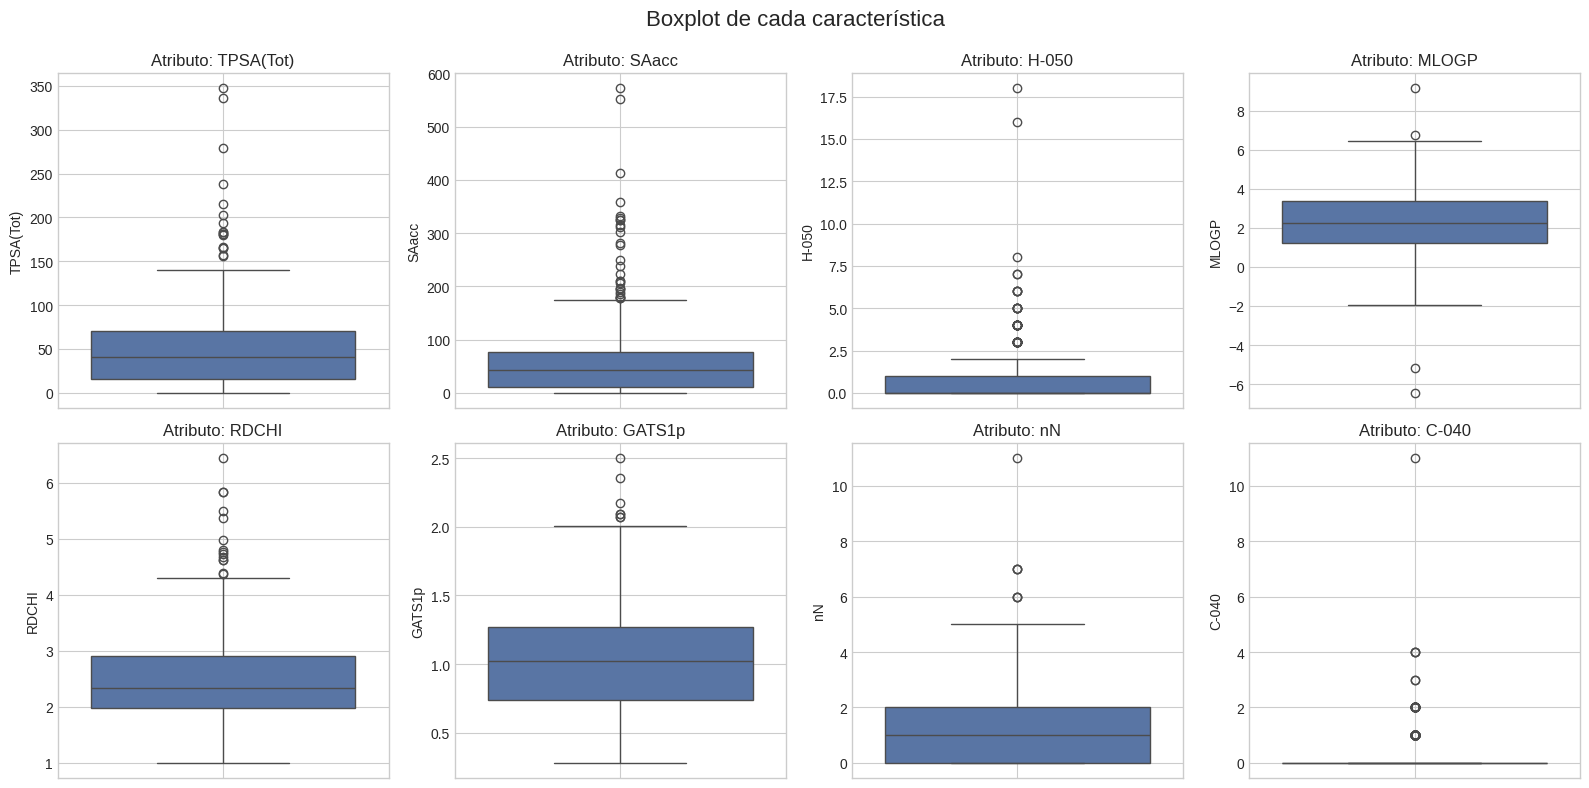

In [ ]:
# Ejemplo de código para boxplots
plt.figure(figsize=(16, 8))
plt.suptitle('Boxplot de cada característica', size=16)

# Iterar sobre las columnas para crear subplots
for i, col in enumerate(df.columns[1:-1]):  # ajusta los índices según tu dataset
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Atributo: {col}')
    plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

**COMENTARIO:**

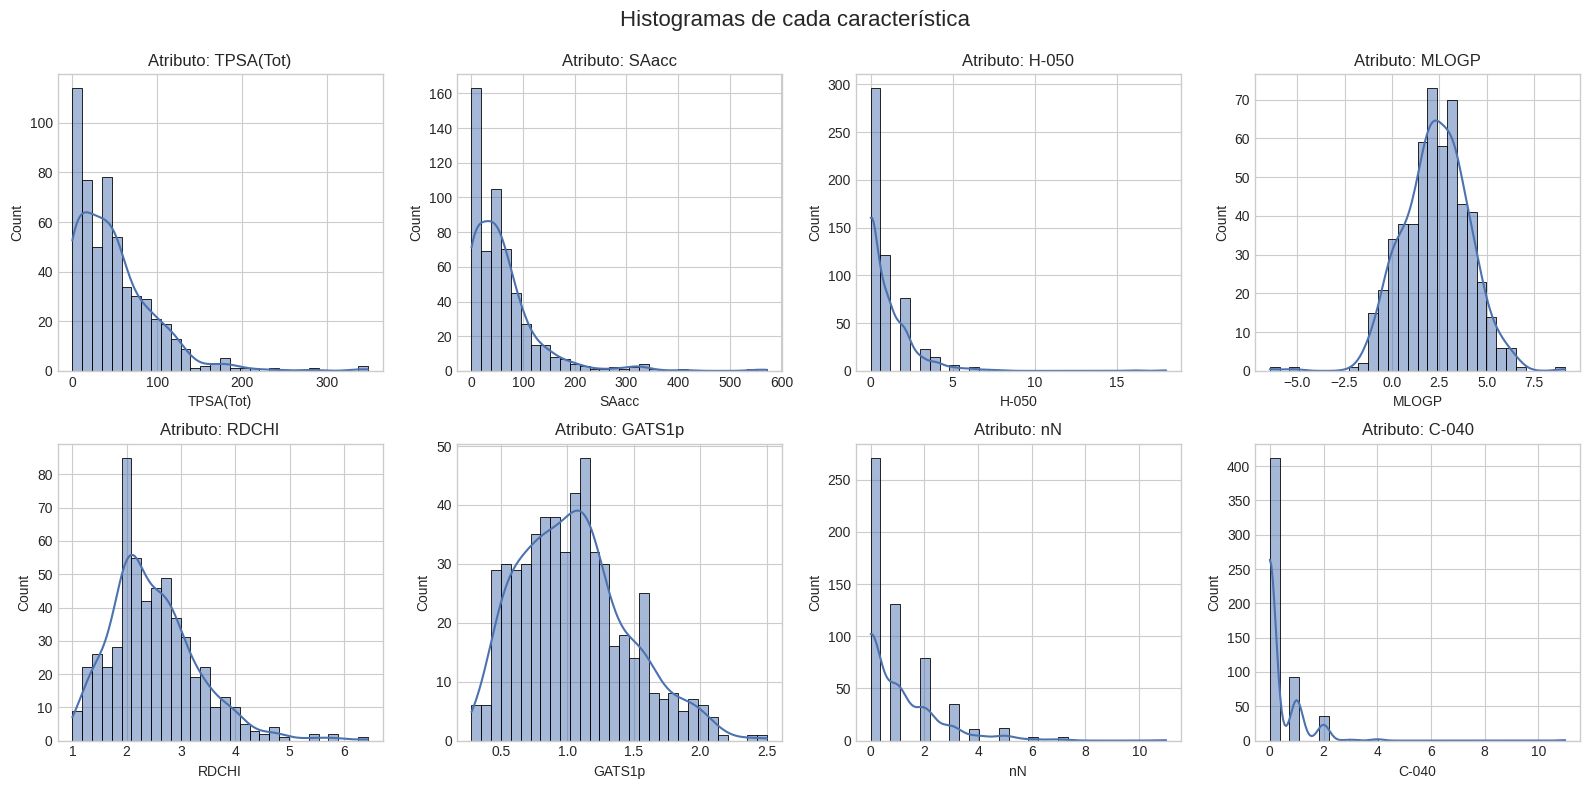

In [ ]:
# Crea histogramas para visualizar distribuciones
# Puedes usar un enfoque similar al de los boxplots

plt.figure(figsize=(16, 8))
plt.suptitle('Histogramas de cada característica', size=16)

# Iterar sobre las columnas para crear subplots
for i, col in enumerate(df.columns[1:-1]):  # ajusta los índices según tu dataset
    plt.subplot(2, 4, i+1)
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f'Atributo: {col}')
    plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

**COMENTARIO:**

### 1.a.3 (3 pts) Separe el dataset en conjuntos de entrenamiento, validación y test, considerando un 70% de los datos para entrenamiento, un 20% para validación y un 10% para test.

In [ ]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop([df.columns[0], 'quantitative response'], axis=1).values
y = df['quantitative response'].values.reshape(-1, 1)

# Paso 1: Separar el conjunto de prueba (10%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Paso 2: Separar entrenamiento (70%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2/0.9, random_state=42)

### 1.a.4 (2 pts) Verifique que el tamaño de los conjuntos se asemeje al indicado.

In [ ]:
# Verifica que tienes aproximadamente 70% train, 20% validation, 10% test
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/X.shape[0]:.2%})")
print(f"Conjunto de validación: {X_val.shape[0]} muestras ({X_val.shape[0]/X.shape[0]:.2%})")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/X.shape[0]:.2%})")

Conjunto de entrenamiento: 381 muestras (69.78%)
Conjunto de validación: 110 muestras (20.15%)
Conjunto de prueba: 55 muestras (10.07%)


### 1.a.5 (3 pts) Estandarice las variables predictoras usando StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

# IMPORTANTE: Ajustar el scaler SOLO con datos de entrenamiento para evitar data leakage
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

### 1.a.6 (2 pts) Estandarice la variable objetivo.

In [ ]:
# Aplicar el mismo proceso a la variable objetivo
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

### 1.a.7 (3 pts) ¿Cuál es la función de cada uno de estos conjuntos (train, validation, test)?

**COMENTARIO:**
- Conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo (pesos y sesgos de una red neuronal)
- Conjunto de validación se utiliza para ajustar los hiperparámetros del modelo (número de layers, tasa de aprendizaje, regularización, etc.) y para detectar overfitting.
- Conjunto de test: se utiliza una sola vez, al final del proceso para evaluar la capacidad de generalización del modelo.

### 1.a.8 (2 pts) Visualice la distribución de algunas variables antes y después de la estandarización.

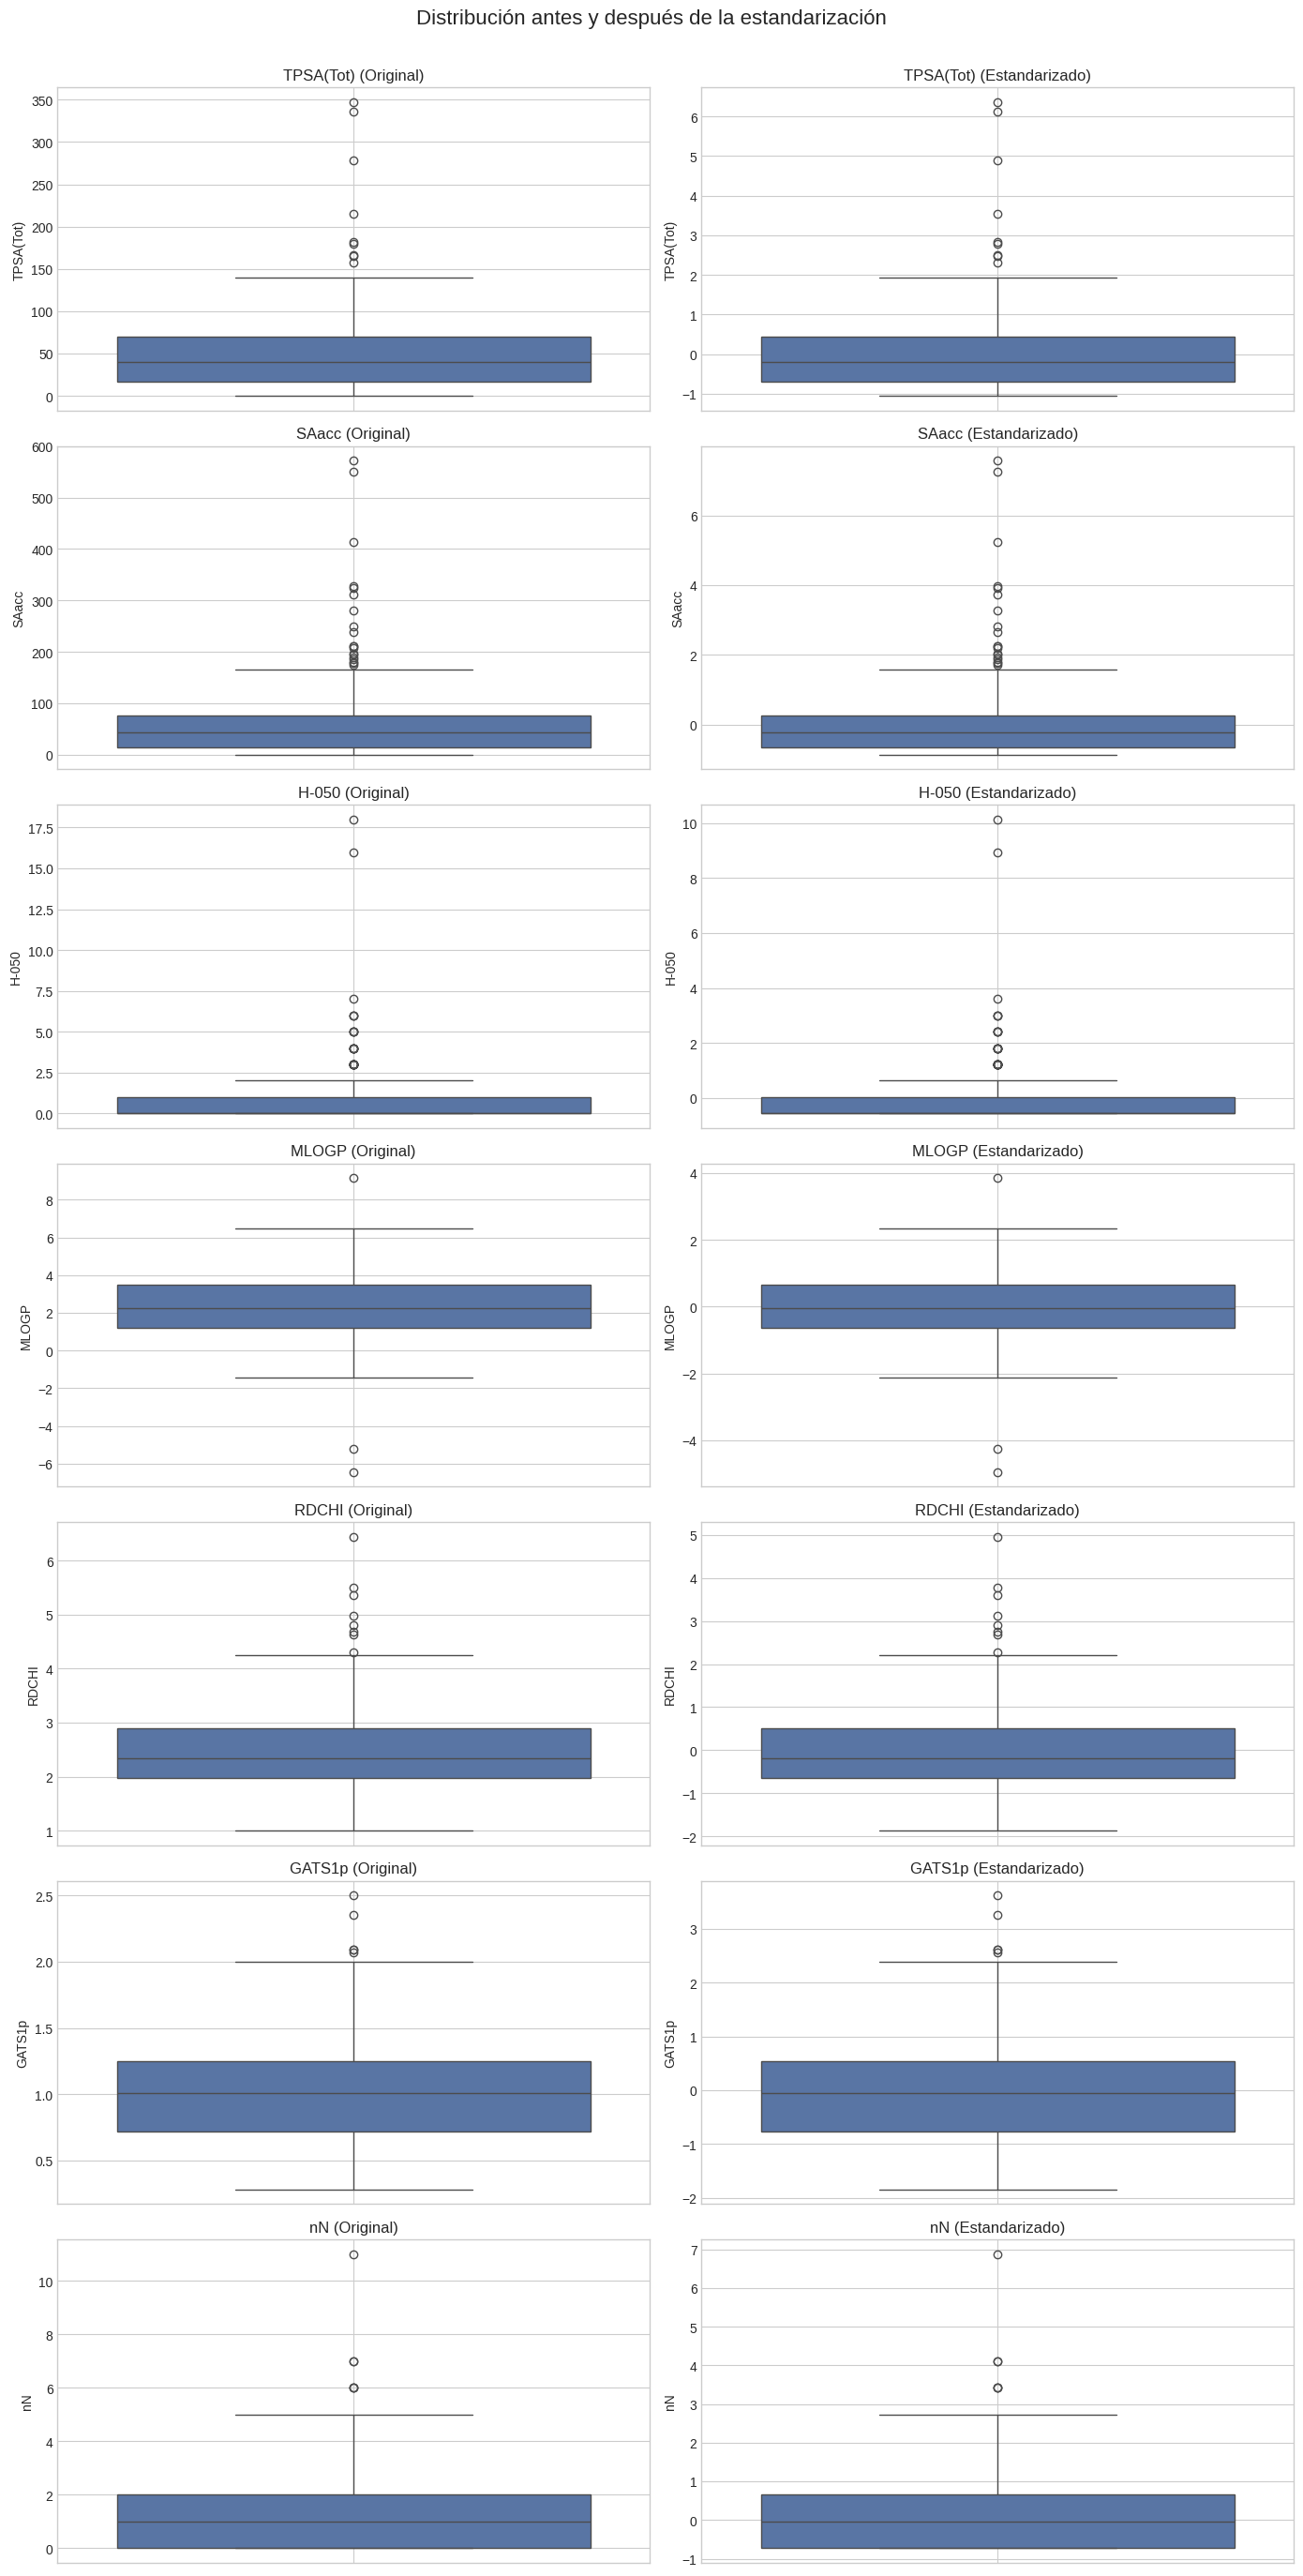

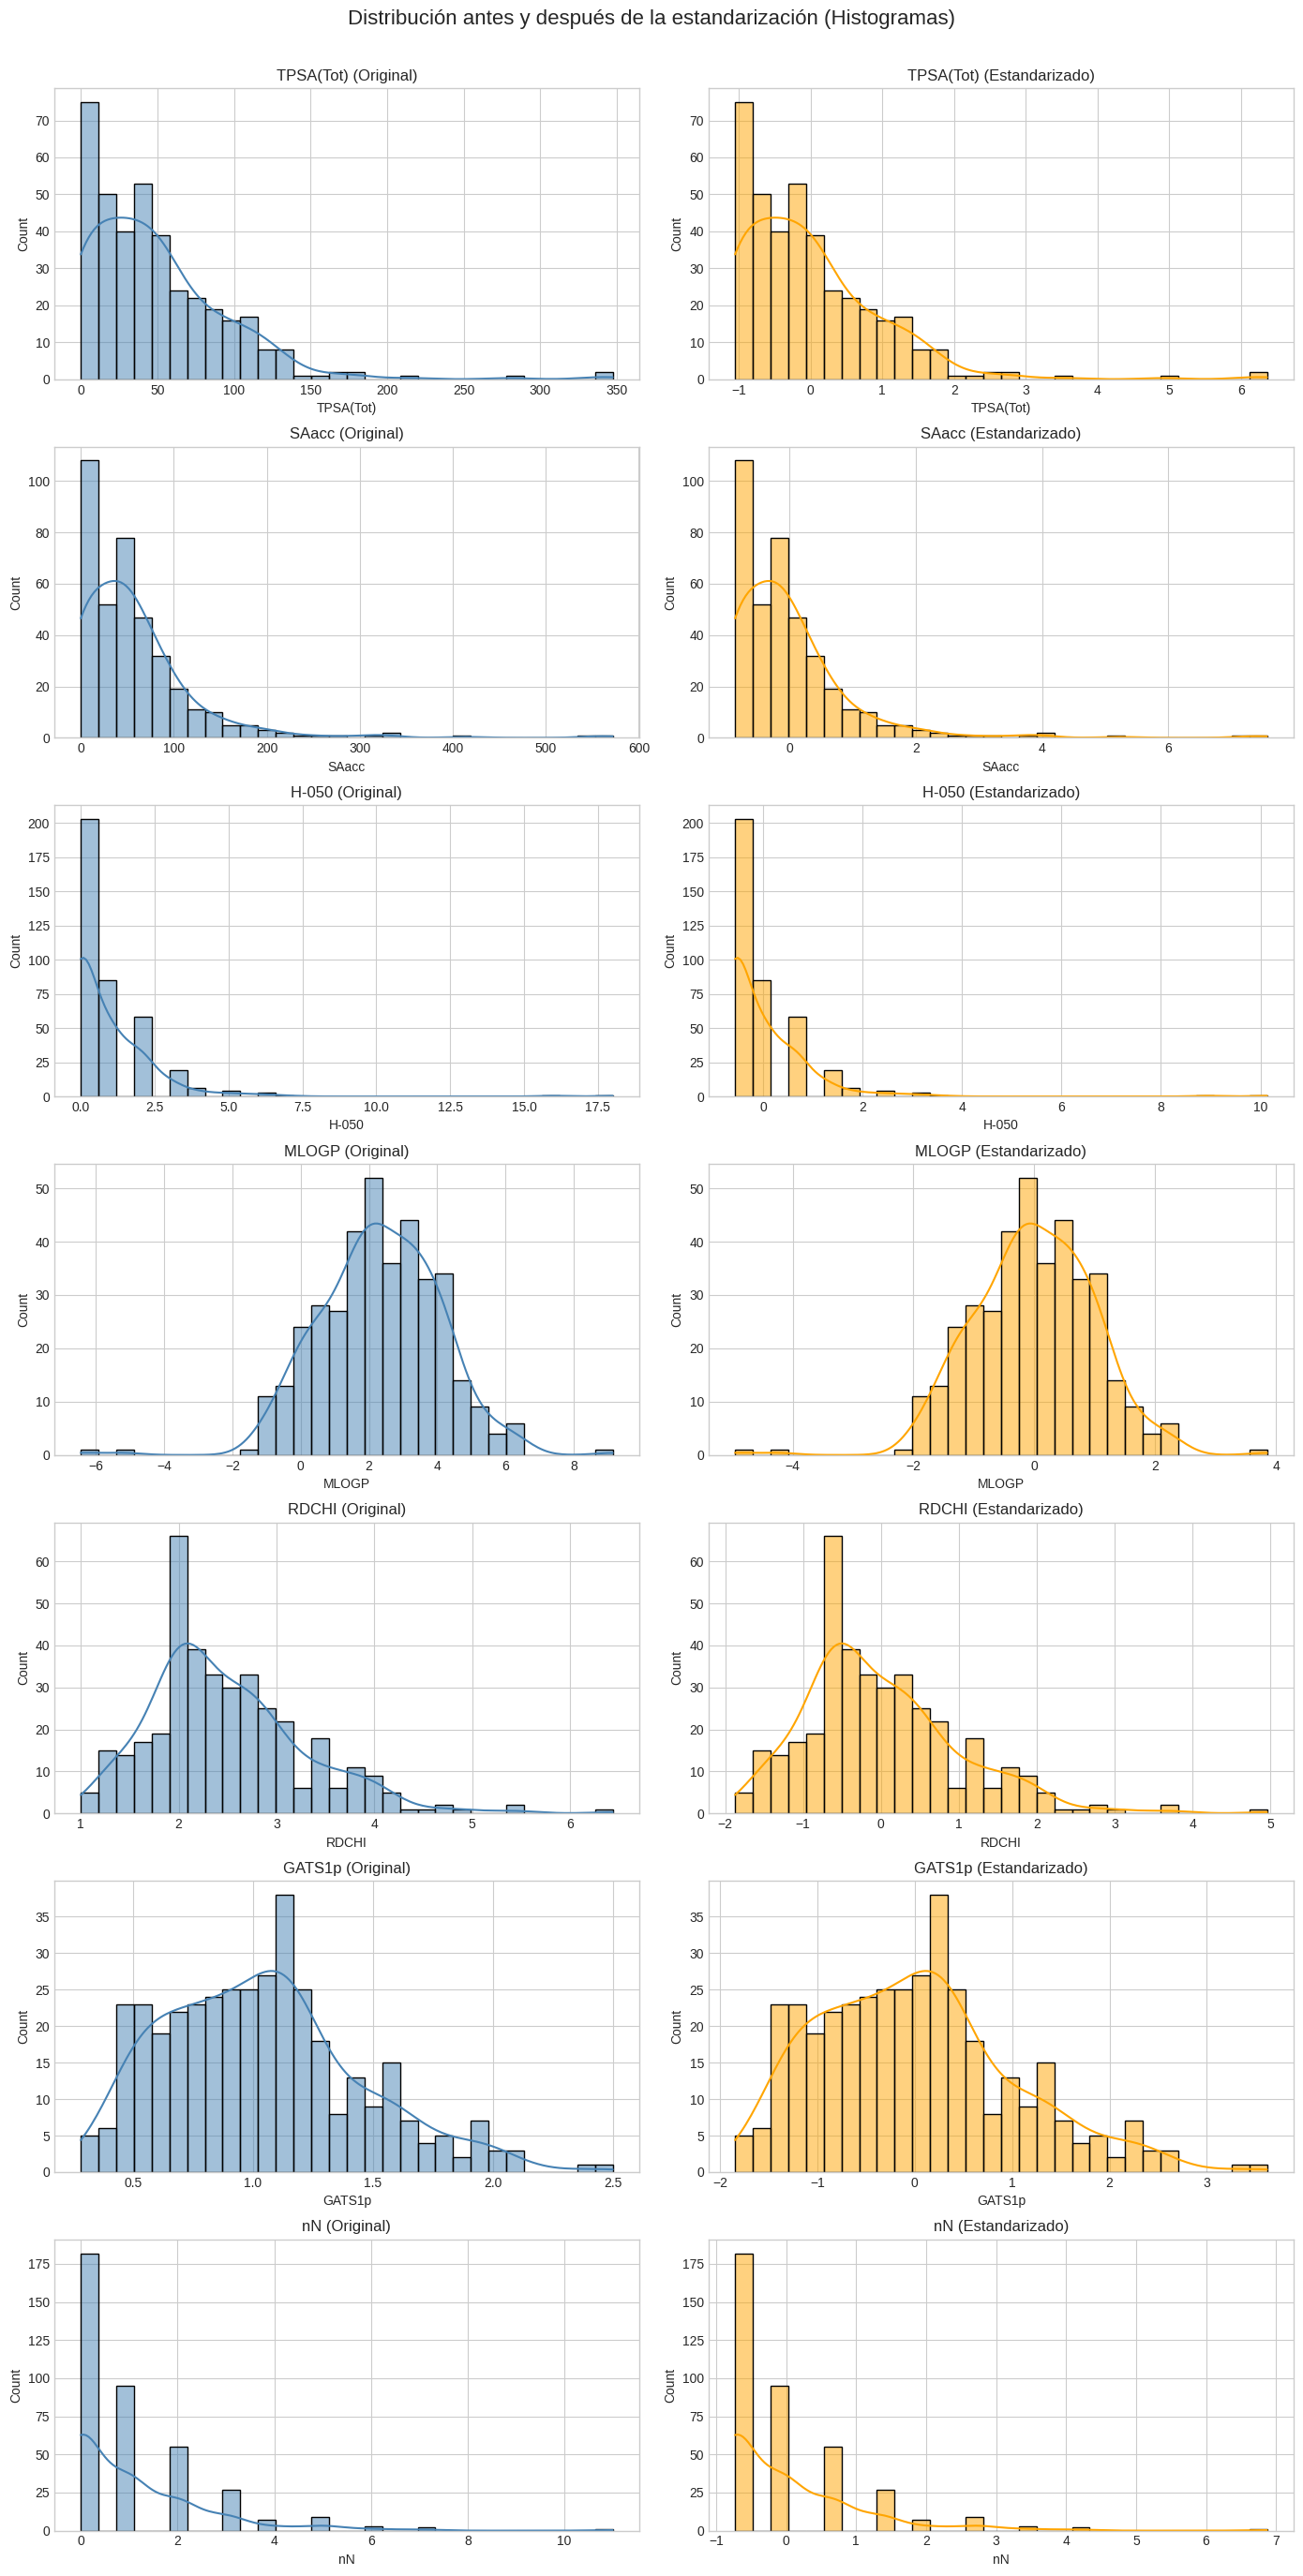

In [ ]:
# Selecciona algunas variables para comparar

columnas = df.drop([df.columns[0], 'quantitative response'], axis=1).columns
vars_elegidas = columnas[:-1]

# Conjuntos con las variables seleccionadas
X_train_df = pd.DataFrame(X_train, columns=columnas)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columnas)

# Crea visualizaciones para mostrar distribuciones antes y después de la estandarización
# Usa histogramas o boxplots

n_vars = len(vars_elegidas)
fig, axes = plt.subplots(nrows=n_vars, ncols=2, figsize=(14, 4 * n_vars))
fig.suptitle("Distribución antes y después de la estandarización", fontsize=16)

for i, var in enumerate(vars_elegidas):
    sns.boxplot(y=X_train_df[var], ax=axes[i, 0])
    axes[i, 0].set_title(f"{var} (Original)")
    axes[i, 0].grid(True)

    sns.boxplot(y=X_train_scaled_df[var], ax=axes[i, 1])
    axes[i, 1].set_title(f"{var} (Estandarizado)")
    axes[i, 1].grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

fig, axes = plt.subplots(nrows=n_vars, ncols=2, figsize=(14, 4 * n_vars))
fig.suptitle("Distribución antes y después de la estandarización (Histogramas)", fontsize=16)

for i, var in enumerate(vars_elegidas):
    sns.histplot(X_train_df[var], ax=axes[i, 0], kde=True, bins=30, color='steelblue')
    axes[i, 0].set_title(f"{var} (Original)")
    axes[i, 0].grid(True)

    sns.histplot(X_train_scaled_df[var], ax=axes[i, 1], kde=True, bins=30, color='orange')
    axes[i, 1].set_title(f"{var} (Estandarizado)")
    axes[i, 1].grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## 1.b Función para evaluar modelos y medir errores

### 1.b.1 (2 pts) Importe las librerías necesarias para trabajar con redes neuronales.

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, activations, optimizers
from tensorflow.keras.callbacks import History, EarlyStopping
from tensorflow.keras.regularizers import l1, l2

# Verificar versión y dispositivos disponibles
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU disponible: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.18.0
GPU disponible: []


### 1.b.2 (3 pts) Defina una función para calcular el MSE en la escala original de los datos.

In [ ]:
from sklearn.metrics import mean_squared_error

def calculate_original_mse(y_true_scaled, y_pred_scaled, scaler):
    """
    Calcula el MSE en la escala original de los datos.

    Parámetros:
    y_true_scaled: valores reales escalados
    y_pred_scaled: valores predichos escalados
    scaler: objeto StandardScaler utilizado para escalar la variable objetivo

    Retorna:
    MSE en la escala original
    """
    # Invertir la transformación para volver a la escala original
    y_true_original = scaler.inverse_transform(y_true_scaled)
    y_pred_original = scaler.inverse_transform(y_pred_scaled)

    # Calcular y retornar el MSE en escala original
    mse = mean_squared_error(y_true_original, y_pred_original)
    return mse

## 1.c Búsqueda de hiperparámetros óptimos

### 1.c.1 (5 pts) Defina una función para entrenar y evaluar redes neuronales con diferentes arquitecturas e hiperparámetros.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

def train_evaluate_model(activation, depth, neurons, learning_rate, optimizer_name='SGD',
                         batch_size=32, initializer='glorot_uniform', dropout_rate=0,
                         regularizer_type=None, regularizer_lambda=0, epochs=500, patience=50):
    """
    Entrena y evalúa una red neuronal con los hiperparámetros especificados.

    Parámetros:
    activation: función de activación ('relu', 'sigmoid', 'tanh')
    depth: número de capas ocultas
    neurons: número de neuronas por capa oculta
    learning_rate: tasa de aprendizaje
    optimizer_name: nombre del optimizador ('SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta')
    batch_size: tamaño del batch
    initializer: inicializador de pesos
    dropout_rate: tasa de dropout para regularización
    regularizer_type: tipo de regularización (None, 'l1', 'l2')
    regularizer_lambda: valor lambda para regularización
    epochs: número máximo de épocas de entrenamiento
    patience: paciencia para early stopping

    Retorna:
    model: modelo entrenado
    history: historial de entrenamiento
    val_loss: error de validación mínimo
    test_loss: error en el conjunto de prueba
    test_loss_original: error en escala original en el conjunto de prueba
    """
    # Implementar la función:
    # 1. Seleccionar optimizador y regularizador

    optimizers_dict = {
        'SGD': optimizers.SGD(learning_rate=learning_rate),
        'Adam': optimizers.Adam(learning_rate=learning_rate),
        'RMSprop': optimizers.RMSprop(learning_rate=learning_rate),
        'Adagrad': optimizers.Adagrad(learning_rate=learning_rate),
        'Adadelta': optimizers.Adadelta(learning_rate=learning_rate)
    }
    optimizer = optimizers_dict.get(optimizer_name)

    if regularizer_type == 'l1':
        regularizer = l1(regularizer_lambda)
    elif regularizer_type == 'l2':
        regularizer = l2(regularizer_lambda)
    else:
        regularizer = None

    # 2. Construir la arquitectura

    model = models.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))

    for _ in range(depth):
        model.add(layers.Dense(neurons, activation=activation, kernel_initializer=initializer, kernel_regularizer=regularizer))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(1))  # Capa de salida

    # 3. Compilar y entrenar el modelo

    model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True, verbose=0)

    history = model.fit(
        X_train_scaled, y_train_scaled,
        validation_data=(X_val_scaled, y_val_scaled),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=0
    )

    # 4. Evaluar en conjunto de prueba

    val_loss = model.evaluate(X_val_scaled, y_val_scaled, verbose=0)[0]
    test_loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)[0]
    y_test_pred_scaled = model.predict(X_test_scaled)

    test_loss_original = calculate_original_mse(y_test_scaled, y_test_pred_scaled, scaler_y)

    # 5. Retornar resultados
    return model, history, val_loss, test_loss, test_loss_original

### 1.c.2 (5 pts) Defina los espacios de búsqueda para cada hiperparámetro.

In [ ]:
# Definir los espacios de búsqueda para autotuning
activations = ['relu', 'sigmoid', 'tanh']
depths = [1, 2, 3]  # Número de capas ocultas
neurons_list = [20, 50, 100]  # Neuronas por capa
learning_rates = [0.001, 0.01, 0.1]  # Tasas de aprendizaje

# Parámetros fijos para la búsqueda inicial
fixed_batch_size = 32
fixed_initializer = 'glorot_uniform'
fixed_optimizer = 'SGD'
fixed_patience = 50

# Definir también valores para los estudios de ablación posteriores
depths_study = [1, 2, 3, 4, 5, 6]
neurons_study = [10, 20, 50, 100, 150, 200]
learning_rates_study = np.logspace(-5, -1, 8)  # Rango logarítmico
batch_sizes_study = [1, 8, 16, 32, 64, 128, 256, -1]  # -1 será reemplazado por el tamaño total
optimizers_study = ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta']
initializers_study = ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal', 'random_uniform']

# Estructuras para almacenar resultados
results = []
best_val_loss = float('inf')
best_params = {}

### 1.c.3 (10 pts) Realice una búsqueda sistemática de hiperparámetros usando un número limitado de trials aleatorios.

In [ ]:
import random

# Definir el número de trials (experimentos)
num_trials = 20  # Ajustar según tiempo disponible
print(f"Realizando búsqueda de hiperparámetros con {num_trials} trials aleatorios")

results = []
best_val_loss = float('inf')
best_params = {}
best_model = None
best_history = None
best_test_loss = None
best_test_loss_orig = None

# Implementar la búsqueda aleatoria de hiperparámetros

for trial in range(1, num_trials + 1):
    act = random.choice(activations)
    depth = random.choice(depths)
    neurons = random.choice(neurons_list)
    lr = random.choice(learning_rates)

    params = {
        'activation': act,
        'depth': depth,
        'neurons': neurons,
        'learning_rate': lr,
        'optimizer_name': fixed_optimizer,
        'batch_size': fixed_batch_size,
        'initializer': fixed_initializer,
    }


# Usar train_evaluate_model para cada combinación seleccionada

    model, history, val_loss, test_loss, test_loss_orig = train_evaluate_model(
        activation=act,
        depth=depth,
        neurons=neurons,
        learning_rate=lr,
        optimizer_name=fixed_optimizer,
        batch_size=fixed_batch_size,
        initializer=fixed_initializer
    )

# Almacenar resultados y actualizar el mejor modelo

    trial_results = {
        **params,
        'val_loss': val_loss,
        'test_loss': test_loss,
        'test_loss_orig': test_loss_orig,
        'history': history.history
    }

    results.append(trial_results)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_params = params.copy()
        best_history = history.history
        best_model = model
        best_test_loss = test_loss
        best_test_loss_orig = test_loss_orig

    print(f"Trial {trial:02d}/{num_trials} - act={act}, depth={depth}, neurons={neurons}, lr={lr:.4f}  "
          f"| val_loss={val_loss:.4f}, test_loss_orig={test_loss_orig:.4f}")

Realizando búsqueda de hiperparámetros con 20 trials aleatorios
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Trial 01/20 - act=relu, depth=1, neurons=100, lr=0.0100  | val_loss=0.4538, test_loss_orig=1.4346
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Trial 02/20 - act=sigmoid, depth=2, neurons=20, lr=0.1000  | val_loss=0.4793, test_loss_orig=1.5274
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Trial 03/20 - act=tanh, depth=2, neurons=50, lr=0.1000  | val_loss=0.4749, test_loss_orig=1.5687
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Trial 04/20 - act=sigmoid, depth=1, neurons=100, lr=0.0010  | val_loss=0.5484, test_loss_orig=1.7669
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Trial 05/20 - act=tanh, depth=2, neurons=100, lr=0.0010  | val_loss=0.4782, test_loss_orig=1.5396
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Trial 06/20 - act=sigmoid, depth=1, neurons=100, lr=0.0010  | val_loss=0.5335, test_loss_orig=1.7069
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Trial 07/20 - act=relu, depth=1, neurons=20, lr=0.0010  | val_loss=0.4934, 

### 1.c.4 (5 pts) Analice los resultados y determine la mejor combinación de hiperparámetros.

In [ ]:
# Ordenar resultados por error de validación

results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='val_loss', ascending=True).reset_index(drop=True)

# Mostrar los mejores modelos
print("\nTop 5 mejores modelos:")
print(results_df_sorted.head(5))

# Analizar tendencias por hiperparámetro
for hp in ['activation', 'depth', 'neurons', 'learning_rate']:
    trend = (results_df
             .groupby(hp)['val_loss']
             .mean()
             .sort_values()
             .reset_index())
    print(f"\nTendencia por {hp}:")
    print(trend)


Top 5 mejores modelos:
  activation  depth  neurons  learning_rate optimizer_name  batch_size  \
0       relu      1       50           0.01            SGD          32   
1       relu      2      100           0.01            SGD          32   
2       relu      1      100           0.01            SGD          32   
3       relu      3      100           0.01            SGD          32   
4       tanh      3       50           0.01            SGD          32   

      initializer  val_loss  test_loss  test_loss_orig  \
0  glorot_uniform  0.449243   0.540906        1.552507   
1  glorot_uniform  0.452031   0.493163        1.415477   
2  glorot_uniform  0.453761   0.499825        1.434596   
3  glorot_uniform  0.455340   0.528996        1.518322   
4  glorot_uniform  0.461083   0.527821        1.514950   

                                             history  
0  {'loss': [1.1291241645812988, 0.83624750375747...  
1  {'loss': [1.0024681091308594, 0.82012003660202...  
2  {'loss': [0.84

### 1.c.5 (5 pts) Visualice el proceso de entrenamiento del mejor modelo encontrado.


--- Historial del mejor modelo ---
Hiperparámetros: {'activation': 'relu', 'depth': 1, 'neurons': 50, 'learning_rate': 0.01, 'optimizer_name': 'SGD', 'batch_size': 32, 'initializer': 'glorot_uniform'}
Mejor val_loss: 0.4492
Test loss (escalado): 0.5409


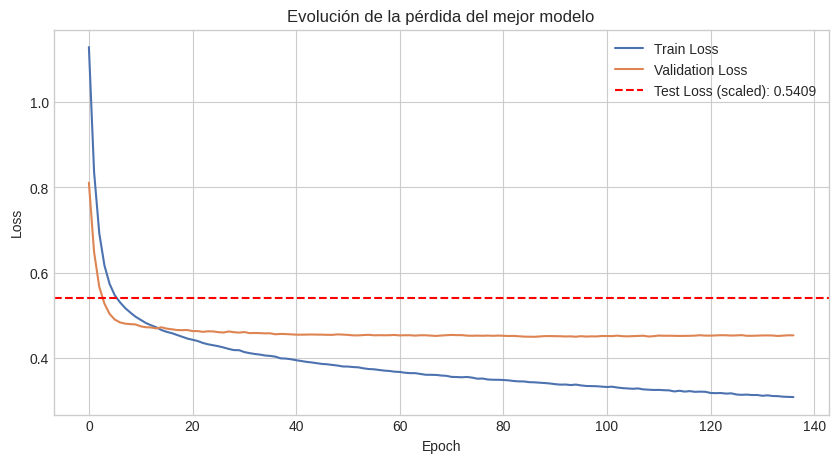

In [ ]:
# Obtener el historial del mejor modelo
print("\n--- Historial del mejor modelo ---")
print(f"Hiperparámetros: {best_params}")
print(f"Mejor val_loss: {best_val_loss:.4f}")
print(f"Test loss (escalado): {best_test_loss:.4f}")

# Graficar evolución de loss y val_loss
plt.figure(figsize=(10, 5))
plt.plot(best_history['loss'], label='Train Loss')
plt.plot(best_history['val_loss'], label='Validation Loss')

# Incluir los errores en test
plt.axhline(y=best_test_loss, color='r', linestyle='--', label=f'Test Loss (scaled): {best_test_loss:.4f}')

plt.title(f'Evolución de la pérdida del mejor modelo')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## 1.d Estudios de ablación/sensibilidad (usando el mejor modelo como base)

### 1.d.1 (5 pts) Sensibilidad a la profundidad de la red: varíe el número de capas manteniendo los demás hiperparámetros óptimos.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Profundidad 1 | val_loss=0.4162, test_loss=0.5033
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Profundidad 2 | val_loss=0.5326, test_loss=0.4644
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Profundidad 3 | val_loss=0.4394, test_loss=0.4888
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Profundidad 4 | val_loss=0.4714, test_loss=0.4711
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Profundidad 5 | val_loss=0.4811, test_loss=0.4975
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Profundidad 6 | val_loss=0.4914, test_loss=0.4871


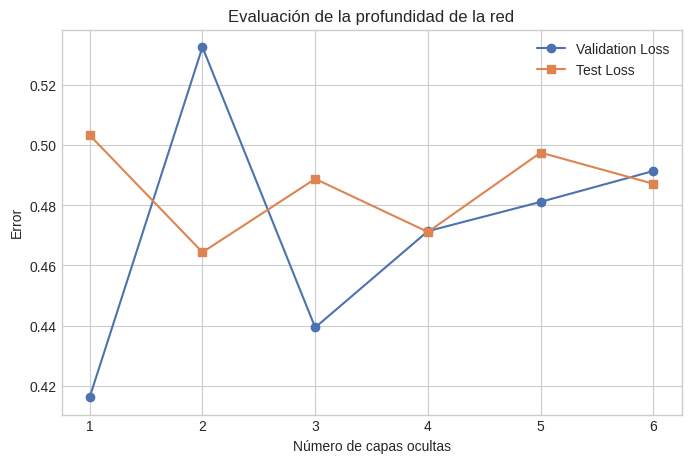

In [ ]:
# Extraer los mejores hiperparámetros encontrados
best_activation = best_params['activation']
best_neurons = best_params['neurons']
best_lr = best_params['learning_rate']

# Evaluar diferentes profundidades (depths_study)
depth_results = []

for d in depths_study:
    model, history, val_loss, test_loss, test_loss_orig = train_evaluate_model(
        activation=best_activation,
        depth=d,
        neurons=best_neurons,
        learning_rate=best_lr,
        optimizer_name=fixed_optimizer,
        batch_size=fixed_batch_size,
        initializer=fixed_initializer
    )

    depth_results.append({
        'depth': d,
        'val_loss': val_loss,
        'test_loss': test_loss,
        'test_loss_orig': test_loss_orig,
        'history': history.history
    })

    print(f"Profundidad {d} | val_loss={val_loss:.4f}, test_loss={test_loss:.4f}")

# Almacenar resultados
depths_df = pd.DataFrame(depth_results)

# Graficar profundidad vs error
plt.figure(figsize=(8, 5))
plt.plot(depths_df['depth'], depths_df['val_loss'], marker='o', label='Validation Loss')
plt.plot(depths_df['depth'], depths_df['test_loss'], marker='s', label='Test Loss')
plt.xlabel('Número de capas ocultas')
plt.ylabel('Error')
plt.title('Evaluación de la profundidad de la red')
plt.grid(True)
plt.legend()
plt.show()

# Encontrar la mejor profundidad
best_depth_row = depths_df.loc[depths_df['val_loss'].idxmin()]
best_depth = int(best_depth_row['depth'])

### 1.d.2 (5 pts) Sensibilidad al número de neuronas: varíe el número de neuronas por capa manteniendo los demás hiperparámetros óptimos.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
10 neuronas por capa | val_loss=0.5145, test_loss=0.5224
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
20 neuronas por capa | val_loss=0.4398, test_loss=0.4840
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
50 neuronas por capa | val_loss=0.4350, test_loss=0.5263
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
100 neuronas por capa | val_loss=0.4709, test_loss=0.5029
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
150 neuronas por capa | val_loss=0.4619, test_loss=0.4809
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
200 neuronas por capa | val_loss=0.4480, test_loss=0.5025


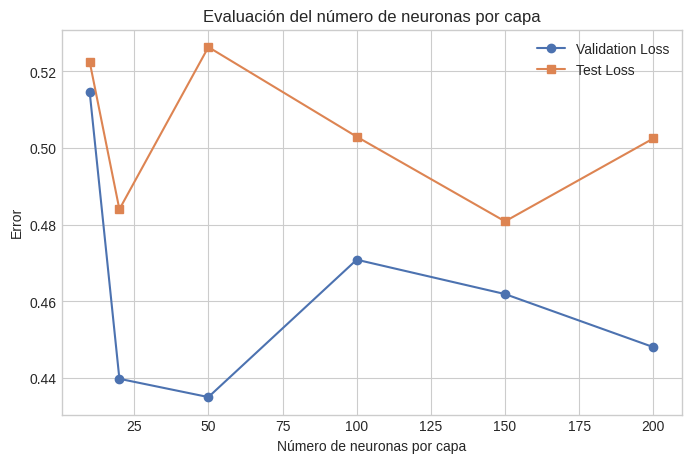

In [ ]:
# Similar al punto anterior, pero variando el número de neuronas (neurons_study)
best_activation = best_params['activation']
best_depth = best_params['depth']
best_lr = best_params['learning_rate']

# Evaluar diferentes cantidades de neuronas (neurons_study)
neurons_results = []

for n in neurons_study:
    model, history, val_loss, test_loss, test_loss_orig = train_evaluate_model(
        activation=best_activation,
        depth=best_depth,
        neurons=n,
        learning_rate=best_lr,
        optimizer_name=fixed_optimizer,
        batch_size=fixed_batch_size,
        initializer=fixed_initializer
    )

    neurons_results.append({
        'neurons': n,
        'val_loss': val_loss,
        'test_loss': test_loss,
        'test_loss_orig': test_loss_orig,
        'history': history.history
    })

    print(f"{n} neuronas por capa | val_loss={val_loss:.4f}, test_loss={test_loss:.4f}")

# Almacenar resultados
neurons_df = pd.DataFrame(neurons_results)

# Graficar neuronas vs error
plt.figure(figsize=(8, 5))
plt.plot(neurons_df['neurons'], neurons_df['val_loss'], marker='o', label='Validation Loss')
plt.plot(neurons_df['neurons'], neurons_df['test_loss'], marker='s', label='Test Loss')
plt.xlabel('Número de neuronas por capa')
plt.ylabel('Error')
plt.title('Evaluación del número de neuronas por capa')
plt.grid(True)
plt.legend()
plt.show()

# Encontrar la mejor cantidad de neuronas
best_neurons_row = neurons_df.loc[neurons_df['val_loss'].idxmin()]
best_neurons_tuned = int(best_neurons_row['neurons'])


### 1.d.3 (5 pts) Sensibilidad a la tasa de aprendizaje: varíe el learning rate manteniendo los demás hiperparámetros óptimos.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Learning rate 0.00001 | val_loss=0.9490, test_loss=0.9685
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Learning rate 0.00004 | val_loss=0.6903, test_loss=0.6874
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Learning rate 0.00014 | val_loss=0.5321, test_loss=0.6073
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Learning rate 0.00052 | val_loss=0.5047, test_loss=0.6084
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Learning rate 0.00193 | val_loss=0.4626, test_loss=0.5213
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Learning rate 0.00720 | val_loss=0.4571, test_loss=0.4742
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Learning rate 0.02683 | val_loss=0.4629, test_loss=0.5125
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Learning rate 0.10000 | val_loss=0.4537, test_loss=0.4410


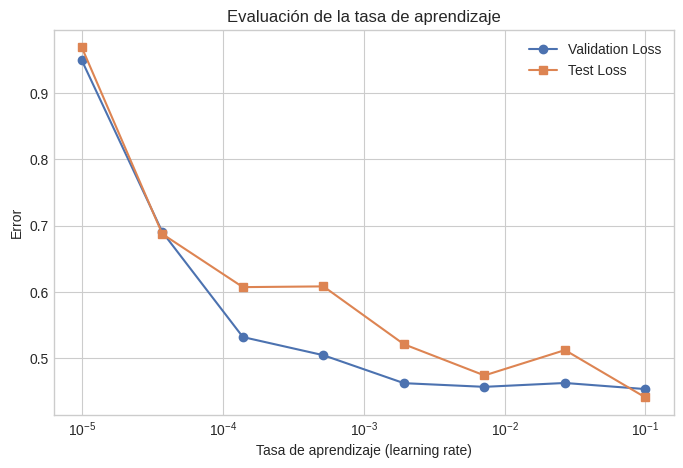

In [ ]:
# Similar al punto anterior, pero variando el learning rate (learning_rates_study)
# Para visualización, usar escala logarítmica en el eje x

best_activation = best_params['activation']
best_depth = best_params['depth']
best_neurons = best_params['neurons']

# Evaluar diferentes tasas de aprendizaje (learning_rates_study)
lr_results = []

for lr in learning_rates_study:
    model, history, val_loss, test_loss, test_loss_orig = train_evaluate_model(
        activation=best_activation,
        depth=best_depth,
        neurons=best_neurons,
        learning_rate=lr,
        optimizer_name=fixed_optimizer,
        batch_size=fixed_batch_size,
        initializer=fixed_initializer
    )

    lr_results.append({
        'learning_rate': lr,
        'val_loss': val_loss,
        'test_loss': test_loss,
        'test_loss_orig': test_loss_orig,
        'history': history.history
    })

    print(f"Learning rate {lr:.5f} | val_loss={val_loss:.4f}, test_loss={test_loss:.4f}")

# Almacenar resultados
lr_df = pd.DataFrame(lr_results)

# Graficar learning rate vs error con escala logarítmica en el eje x
plt.figure(figsize=(8, 5))
plt.plot(lr_df['learning_rate'], lr_df['val_loss'], marker='o', label='Validation Loss')
plt.plot(lr_df['learning_rate'], lr_df['test_loss'], marker='s', label='Test Loss')
plt.xscale('log')  # Escala logarítmica para el eje x
plt.xlabel('Tasa de aprendizaje (learning rate)')
plt.ylabel('Error')
plt.title('Evaluación de la tasa de aprendizaje')
plt.grid(True)
plt.legend()
plt.show()

# Encontrar el mejor learning rate
best_lr_row = lr_df.loc[lr_df['val_loss'].idxmin()]
best_lr_tuned = best_lr_row['learning_rate']

### 1.d.4 (5 pts) Sensibilidad al batch size: varíe el tamaño del batch manteniendo los demás hiperparámetros óptimos.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Batch size 1 | val_loss=0.4500, test_loss=0.4718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Batch size 8 | val_loss=0.4517, test_loss=0.5195
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Batch size 16 | val_loss=0.4473, test_loss=0.4940
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Batch size 32 | val_loss=0.4483, test_loss=0.4795
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Batch size 64 | val_loss=0.4589, test_loss=0.5287
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Batch size 128 | val_loss=0.4497, test_loss=0.4849
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Batch size 256 | val_loss=0.4695, test_loss=0.5304
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Batch size 381 | val_loss=0.4672, test_loss=0.5537


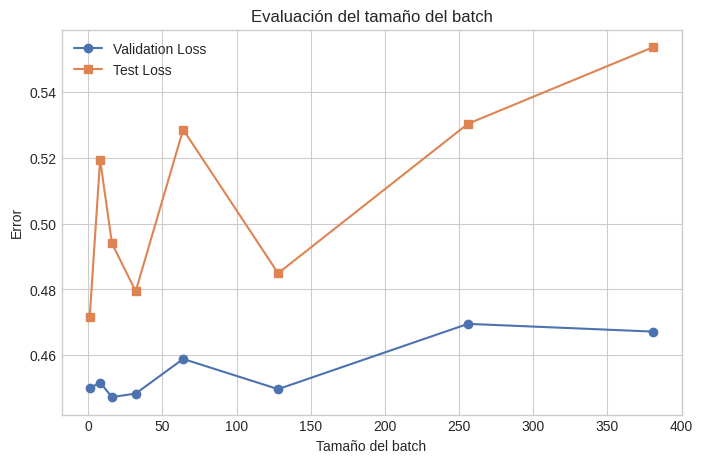

In [ ]:
# Similar al punto anterior, pero variando el batch size (batch_sizes_study)
# Considerar el caso especial para batch size = tamaño total del conjunto de entrenamiento

best_activation = best_params['activation']
best_depth = best_params['depth']
best_neurons = best_params['neurons']
best_lr = best_params['learning_rate']

# Evaluar diferentes batch sizes
batch_results = []

for b in batch_sizes_study:
    # Caso especial: batch_size = -1 => usar tamaño total del conjunto de entrenamiento
    batch_size = X_train_scaled.shape[0] if b == -1 else b

    model, history, val_loss, test_loss, test_loss_orig = train_evaluate_model(
        activation=best_activation,
        depth=best_depth,
        neurons=best_neurons,
        learning_rate=best_lr,
        optimizer_name=fixed_optimizer,
        batch_size=batch_size,
        initializer=fixed_initializer
    )

    batch_results.append({
        'batch_size': batch_size,
        'val_loss': val_loss,
        'test_loss': test_loss,
        'test_loss_orig': test_loss_orig,
        'history': history.history
    })

    print(f"Batch size {batch_size} | val_loss={val_loss:.4f}, test_loss={test_loss:.4f}")

# Almacenar resultados
batch_df = pd.DataFrame(batch_results)

# Graficar batch size vs error (eje x lineal)
plt.figure(figsize=(8, 5))
plt.plot(batch_df['batch_size'], batch_df['val_loss'], marker='o', label='Validation Loss')
plt.plot(batch_df['batch_size'], batch_df['test_loss'], marker='s', label='Test Loss')
plt.xlabel('Tamaño del batch')
plt.ylabel('Error')
plt.title('Evaluación del tamaño del batch')
plt.grid(True)
plt.legend()
plt.show()

# Encontrar el mejor batch size
best_batch_row = batch_df.loc[batch_df['val_loss'].idxmin()]
best_batch_size_tuned = int(best_batch_row['batch_size'])

### 1.d.5 (5 pts) Sensibilidad al optimizador: pruebe diferentes optimizadores manteniendo los demás hiperparámetros óptimos.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Optimizador SGD | val_loss=0.4584, test_loss=0.4707
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Optimizador Adam | val_loss=0.4744, test_loss=0.4948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Optimizador RMSprop | val_loss=0.4757, test_loss=0.4878
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Optimizador Adagrad | val_loss=0.4708, test_loss=0.4814
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Optimizador Adadelta | val_loss=0.6212, test_loss=0.6921


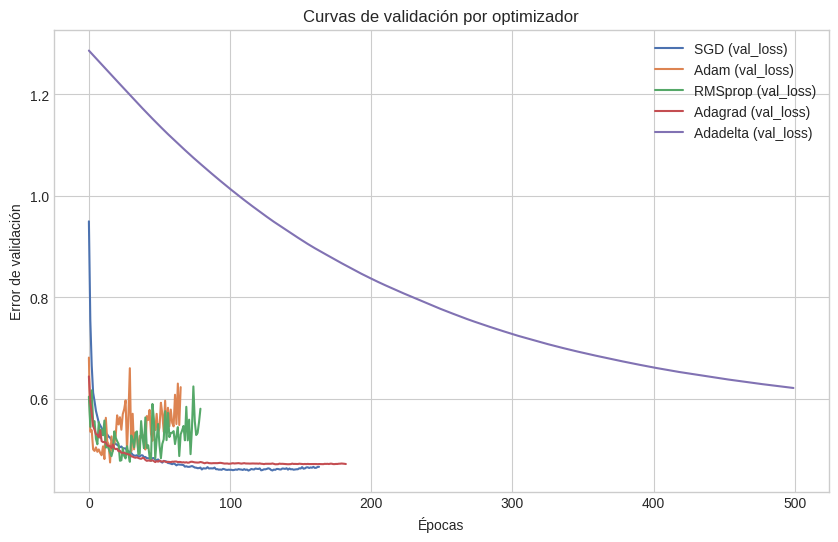

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

# Evaluar diferentes optimizadores (optimizers_study)
# Comparar curvas de aprendizaje entre optimizadores

best_activation = best_params['activation']
best_depth = best_params['depth']
best_neurons = best_params['neurons']
best_lr = best_params['learning_rate']

opt_results = []

for op in optimizers_study:
    model, history, val_loss, test_loss, test_loss_orig = train_evaluate_model(
        activation=best_activation,
        depth=best_depth,
        neurons=best_neurons,
        learning_rate=best_lr,
        optimizer_name=op,
        batch_size=fixed_batch_size,
        initializer=fixed_initializer
    )

    opt_results.append({
        'optimizer': op,
        'val_loss': val_loss,
        'test_loss': test_loss,
        'test_loss_orig': test_loss_orig,
        'history': history.history
    })

    print(f"Optimizador {op} | val_loss={val_loss:.4f}, test_loss={test_loss:.4f}")

# Almacenar resultados
opt_df = pd.DataFrame(opt_results)

# Graficar comparación de curvas de entrenamiento
plt.figure(figsize=(10, 6))

for res in opt_results:
    history = res['history']
    plt.plot(history['val_loss'], label=f"{res['optimizer']} (val_loss)")

plt.xlabel('Épocas')
plt.ylabel('Error de validación')
plt.title('Curvas de validación por optimizador')
plt.legend()
plt.grid(True)
plt.show()

# Encontrar el mejor optimizador
best_opt_row = opt_df.loc[opt_df['val_loss'].idxmin()]
best_optimizer_tuned = best_opt_row['optimizer']

### 1.d.6 (5 pts) Sensibilidad a la inicialización de pesos: pruebe diferentes inicializadores manteniendo los demás hiperparámetros óptimos.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Inicializador glorot_uniform | val_loss=0.4529 ± 0.0137
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Inicializador glorot_normal | val_loss=0.4641 ± 0.0102
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Inicializador he_uniform | val_loss=0.4727 ± 0.0261
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Inicializador he_normal | val_loss=0.4637 ± 0.0121
2/2 ━━━━━━━━━━━━━━━━━━━━ 

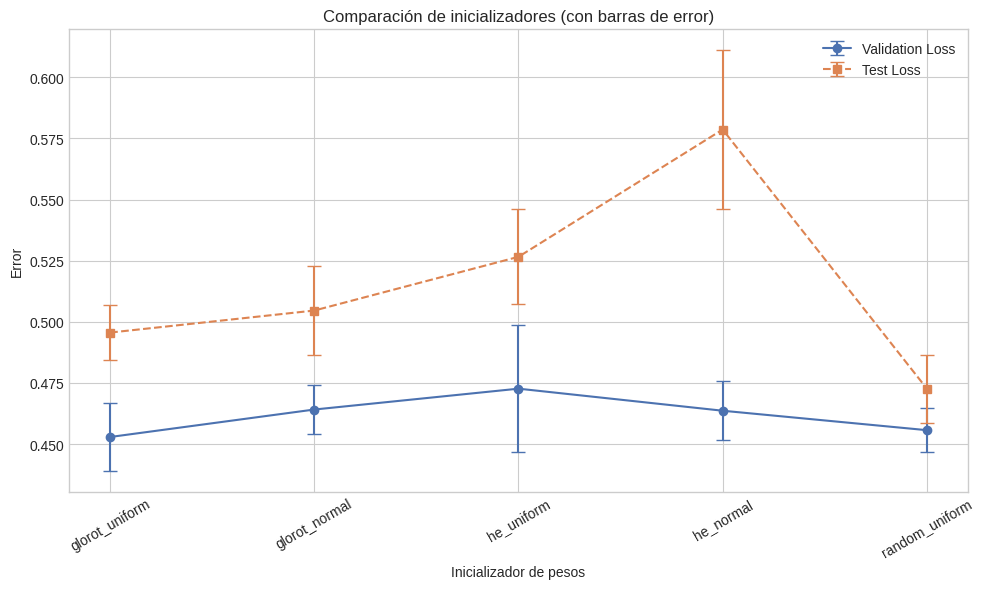

In [ ]:
# Evaluar diferentes inicializadores (initializers_study)
# Realizar múltiples trials para cada inicializador para evaluar variabilidad
# Incluir gráficos con barras de error

n_trials = 5  # Número de repeticiones por inicializador
init_results = []

for init in initializers_study:
    val_losses = []
    test_losses = []
    test_losses_orig = []

    for _ in range(n_trials):
        model, history, val_loss, test_loss, test_loss_orig = train_evaluate_model(
            activation=best_activation,
            depth=best_depth,
            neurons=best_neurons,
            learning_rate=best_lr,
            optimizer_name=fixed_optimizer,
            batch_size=fixed_batch_size,
            initializer=init
        )

        val_losses.append(val_loss)
        test_losses.append(test_loss)
        test_losses_orig.append(test_loss_orig)

    init_results.append({
        'initializer': init,
        'val_loss_mean': np.mean(val_losses),
        'val_loss_std': np.std(val_losses),
        'test_loss_mean': np.mean(test_losses),
        'test_loss_std': np.std(test_losses),
        'test_loss_orig_mean': np.mean(test_losses_orig),
        'test_loss_orig_std': np.std(test_losses_orig)
    })

    print(f"Inicializador {init} | val_loss={np.mean(val_losses):.4f} ± {np.std(val_losses):.4f}")

# Almacenar resultados
init_df = pd.DataFrame(init_results)

# Gráfico con barras de error
plt.figure(figsize=(10, 6))
plt.errorbar(init_df['initializer'], init_df['val_loss_mean'], yerr=init_df['val_loss_std'],
             fmt='o-', capsize=5, label='Validation Loss')
plt.errorbar(init_df['initializer'], init_df['test_loss_mean'], yerr=init_df['test_loss_std'],
             fmt='s--', capsize=5, label='Test Loss')
plt.xlabel('Inicializador de pesos')
plt.ylabel('Error')
plt.title('Comparación de inicializadores (con barras de error)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Encontrar el mejor inicializador
best_init_row = init_df.loc[init_df['val_loss_mean'].idxmin()]
best_initializer_tuned = best_init_row['initializer']

## 1.e Técnicas de regularización

### 1.e.1 (5 pts) Regularización L1 y L2: experimente con diferentes valores de lambda para regularización L1 y L2.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
L1 lambda=0.00000 | val_loss=0.4456 | sparsity=0.00%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
L1 lambda=0.00010 | val_loss=0.4803 | sparsity=0.00%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
L1 lambda=0.00100 | val_loss=0.5465 | sparsity=0.22%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
L1 lambda=0.01000 | val_loss=0.5365 | sparsity=5.11%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
L1 lambda=0.10000 | val_loss=0.5814 | sparsity=0.67%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
L2 lambda=0.00000 | val_loss=0.4651 | L2 norm=4.9589
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
L2 lambda=0.00010 | val_loss=0.4356 | L2 norm=4.7414
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
L2 lambda=0.00100 | val_loss=0.4684 | L2 norm=4.4147
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
L2 lambda=0.01000 | val_loss=0.5298 | L2 norm=4.1948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
L2 lambda=0.10000 | val_loss=0.5046 | L2 norm=3.3087


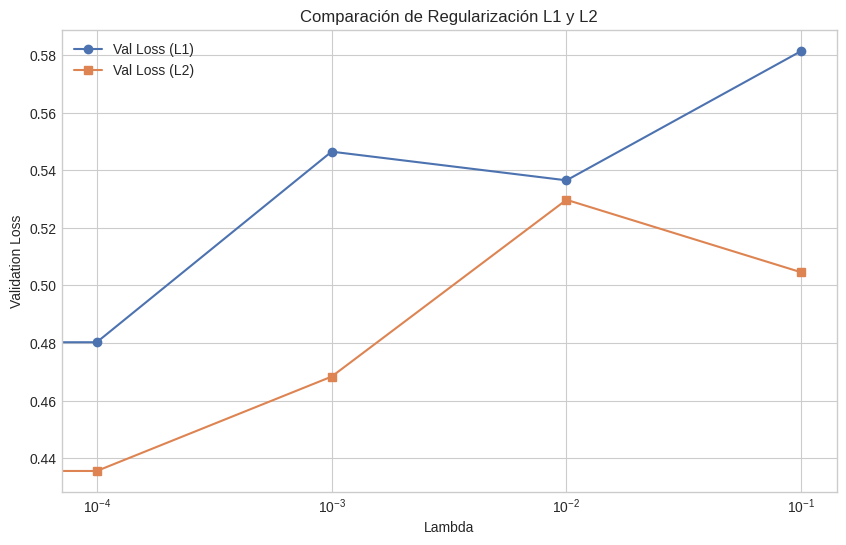

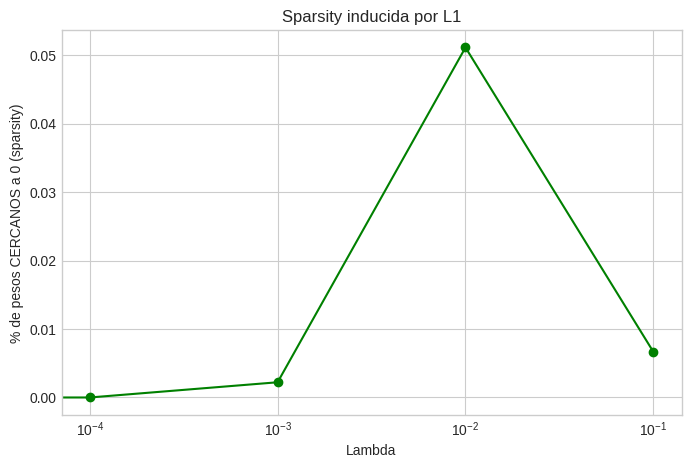

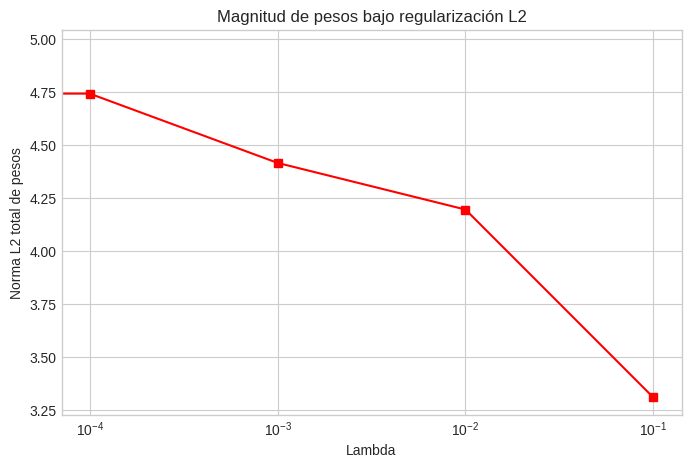

In [ ]:
from tensorflow.keras.regularizers import l1, l2

# Definir valores de lambda a evaluar
lambdas = [0.0, 0.0001, 0.001, 0.01, 0.1]

l1_results = []
l2_results = []

def get_weights_info(model):
    # Extracción de todos los pesos entrenables del modelo
    weights = []
    for layer in model.layers:
        for w in layer.trainable_weights:
            if 'kernel' in w.name:
                weights.append(w.numpy().flatten())
    weights = np.concatenate(weights)
    return weights

# Evaluar regularización L1
# Para L1: analizar efecto en la sparsity (% de pesos = 0)
for lam in lambdas:
    model, history, val_loss, test_loss, test_loss_orig = train_evaluate_model(
        activation=best_activation,
        depth=best_depth,
        neurons=best_neurons,
        learning_rate=best_lr,
        optimizer_name=fixed_optimizer,
        batch_size=fixed_batch_size,
        initializer=fixed_initializer,
        regularizer_type='l1',
        regularizer_lambda=lam
    )

    weights = get_weights_info(model)
    sparsity = np.mean(np.abs(weights) < 1e-5)

    l1_results.append({
        'lambda': lam,
        'val_loss': val_loss,
        'test_loss': test_loss,
        'sparsity': sparsity,
        'weights': weights
    })

    print(f"L1 lambda={lam:.5f} | val_loss={val_loss:.4f} | sparsity={sparsity:.2%}")

# Evaluar regularización L2
# Para L2: analizar efecto en la norma L2 de los pesos
for lam in lambdas:
    model, history, val_loss, test_loss, test_loss_orig = train_evaluate_model(
        activation=best_activation,
        depth=best_depth,
        neurons=best_neurons,
        learning_rate=best_lr,
        optimizer_name=fixed_optimizer,
        batch_size=fixed_batch_size,
        initializer=fixed_initializer,
        regularizer_type='l2',
        regularizer_lambda=lam
    )

    weights = get_weights_info(model)
    l2_norm = np.linalg.norm(weights)

    l2_results.append({
        'lambda': lam,
        'val_loss': val_loss,
        'test_loss': test_loss,
        'l2_norm': l2_norm,
        'weights': weights
    })

    print(f"L2 lambda={lam:.5f} | val_loss={val_loss:.4f} | L2 norm={l2_norm:.4f}")

# Visualizar distribuciones de pesos para diferentes lambdas

l1_df = pd.DataFrame(l1_results)
l2_df = pd.DataFrame(l2_results)

# Comparar el rendimiento de L1 vs L2
plt.figure(figsize=(10, 6))
plt.plot(l1_df['lambda'], l1_df['val_loss'], marker='o', label='Val Loss (L1)')
plt.plot(l2_df['lambda'], l2_df['val_loss'], marker='s', label='Val Loss (L2)')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Validation Loss')
plt.title('Comparación de Regularización L1 y L2')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(l1_df['lambda'], l1_df['sparsity'], marker='o', color='green')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('% de pesos CERCANOS a 0 (sparsity)')
plt.title('Sparsity inducida por L1')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(l2_df['lambda'], l2_df['l2_norm'], marker='s', color='red')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Norma L2 total de pesos')
plt.title('Magnitud de pesos bajo regularización L2')
plt.grid(True)
plt.show()

### 1.e.2 (5 pts) Dropout: experimente con diferentes tasas de dropout en las capas ocultas.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Dropout 0.0 | train_loss=0.3214, val_loss=0.4340, gap=0.1126
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Dropout 0.1 | train_loss=0.3774, val_loss=0.4234, gap=0.0460
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Dropout 0.2 | train_loss=0.3237, val_loss=0.4421, gap=0.1184
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Dropout 0.3 | train_loss=0.3823, val_loss=0.4399, gap=0.0576
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Dropout 0.4 | train_loss=0.4248, val_loss=0.4630, gap=0.0381
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Dropout 0.5 | train_loss=0.4257, val_loss=0.4575, gap=0.0318
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Dropout 0.6 | train_loss=0.4660, val_loss=0.4508, gap=-0.0152


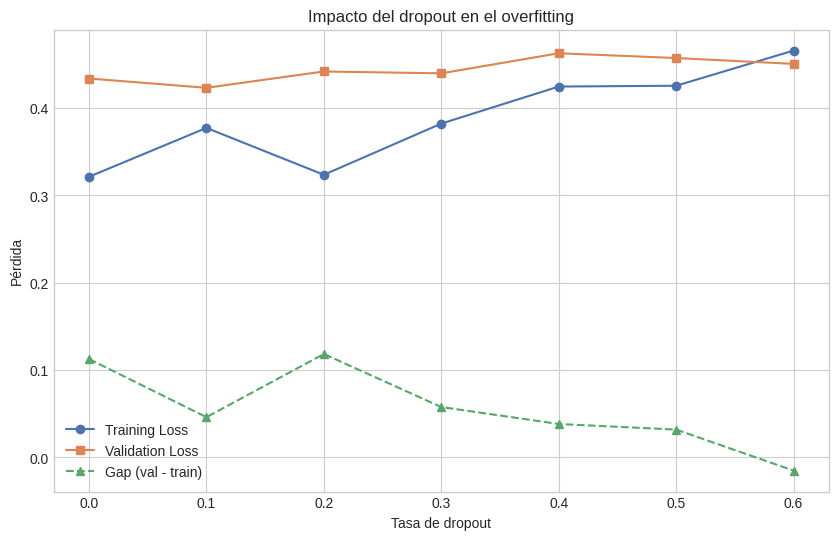


Mejor tasa de dropout: 0.10


In [ ]:
# Definir tasas de dropout a evaluar
dropout_rates = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

dropout_results = []

# Entrenar modelos con diferentes tasas de dropout
for rate in dropout_rates:
    model, history, val_loss, test_loss, test_loss_orig = train_evaluate_model(
        activation=best_activation,
        depth=best_depth,
        neurons=best_neurons,
        learning_rate=best_lr,
        optimizer_name=fixed_optimizer,
        batch_size=fixed_batch_size,
        initializer=fixed_initializer,
        dropout_rate=rate
    )

    history_data = history.history
    train_loss_final = history_data['loss'][-1]
    val_loss_final = history_data['val_loss'][-1]
    gap = val_loss_final - train_loss_final

    dropout_results.append({
        'dropout_rate': rate,
        'train_loss': train_loss_final,
        'val_loss': val_loss_final,
        'gap': gap,
        'test_loss': test_loss
    })

    print(f"Dropout {rate:.1f} | train_loss={train_loss_final:.4f}, val_loss={val_loss_final:.4f}, gap={gap:.4f}")

dropout_df = pd.DataFrame(dropout_results)

# Analizar efecto en diferencia entre error de entrenamiento y validación
# Visualizar y comparar resultados

plt.figure(figsize=(10, 6))
plt.plot(dropout_df['dropout_rate'], dropout_df['train_loss'], marker='o', label='Training Loss')
plt.plot(dropout_df['dropout_rate'], dropout_df['val_loss'], marker='s', label='Validation Loss')
plt.plot(dropout_df['dropout_rate'], dropout_df['gap'], marker='^', label='Gap (val - train)', linestyle='--')
plt.xlabel('Tasa de dropout')
plt.ylabel('Pérdida')
plt.title('Impacto del dropout en el overfitting')
plt.grid(True)
plt.legend()
plt.show()

# Mejor tasa de dropout (mínimo val_loss)
best_dropout_row = dropout_df.loc[dropout_df['val_loss'].idxmin()]
best_dropout = best_dropout_row['dropout_rate']
print(f"\nMejor tasa de dropout: {best_dropout:.2f}")


### 1.e.3 (5 pts) Early Stopping: experimente con diferentes configuraciones de early stopping.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Patience=5 | Epochs trained=41 | Val Loss=0.4692
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Patience=10 | Epochs trained=31 | Val Loss=0.4604
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Patience=20 | Epochs trained=77 | Val Loss=0.4676
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Patience=50 | Epochs trained=104 | Val Loss=0.4507
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Patience=100 | Epochs trained=211 | Val Loss=0.4531


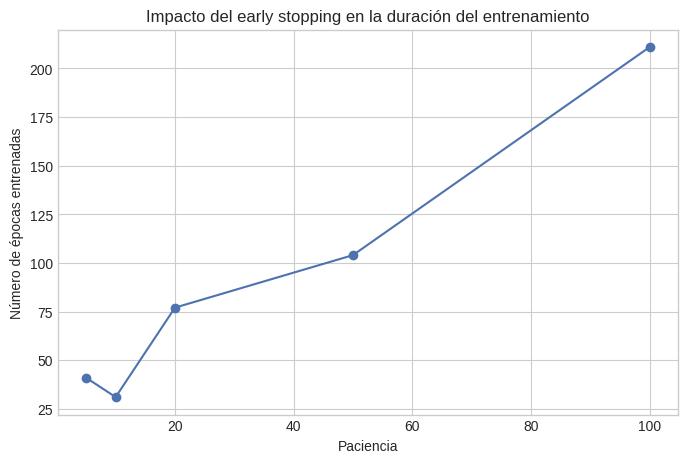

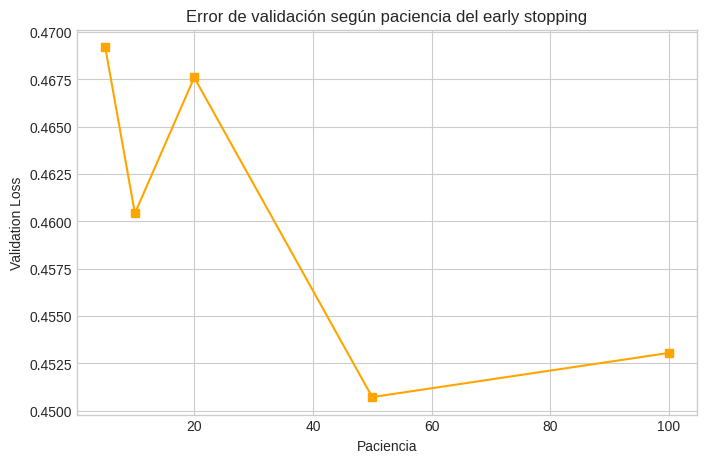

In [ ]:
# Definir valores de paciencia a evaluar
patience_values = [5, 10, 20, 50, 100]

# Entrenar modelos con diferentes valores de paciencia
early_stopping_results = []

for p in patience_values:
    model, history, val_loss, test_loss, test_loss_orig = train_evaluate_model(
        activation=best_activation,
        depth=best_depth,
        neurons=best_neurons,
        learning_rate=best_lr,
        optimizer_name=fixed_optimizer,
        batch_size=fixed_batch_size,
        initializer=fixed_initializer,
        patience=p
    )

    epochs_trained = len(history.history['loss'])

    early_stopping_results.append({
        'patience': p,
        'epochs_trained': epochs_trained,
        'val_loss': val_loss,
        'test_loss': test_loss
    })

    print(f"Patience={p} | Epochs trained={epochs_trained} | Val Loss={val_loss:.4f}")

# Analizar efecto en número de épocas entrenadas y error final
# Visualizar y comparar resultados

early_df = pd.DataFrame(early_stopping_results)

plt.figure(figsize=(8, 5))
plt.plot(early_df['patience'], early_df['epochs_trained'], marker='o', label='Épocas entrenadas')
plt.xlabel('Paciencia')
plt.ylabel('Número de épocas entrenadas')
plt.title('Impacto del early stopping en la duración del entrenamiento')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(early_df['patience'], early_df['val_loss'], marker='s', color='orange', label='Validation Loss')
plt.xlabel('Paciencia')
plt.ylabel('Validation Loss')
plt.title('Error de validación según paciencia del early stopping')
plt.grid(True)
plt.show()